In [1]:
import numpy as np
import pandas as pd

np.__version__, pd.__version__

('2.2.1', '2.2.3')

In [2]:
np.__version__ = 25

In [3]:
np.__version__

25

In [4]:
s = pd.Series(
    [1, 2, 3, 4, 5, 6, 7, 8],
    index = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
)

s

a    1
b    2
c    3
d    4
e    5
f    6
g    7
h    8
dtype: int64

In [5]:
data = {
    "Name": ["Alice", "Bob", "Charlie"],
    "Age": [25, 30, 35],
    "City": ["New York", "Los Angeles", "Chicago"]
}

df = pd.DataFrame(data)

df

,Name,Age,City
0,Alice,25,New York
1,Bob,30,Los Angeles
2,Charlie,35,Chicago


In [6]:
arr = np.array([1, 2, 3, 4])
arr

array([1, 2, 3, 4])

In [7]:
arr = np.array([[1, 2], [3, 4]])

arr.shape, arr.ndim, arr.dtype

((2, 2), 2, dtype('int64'))

In [8]:
xs = np.array([1, 2, 3])
ys = np.array([4, 5, 6])

- elementwise mathematical operations

In [9]:
xs + ys

array([5, 7, 9])

In [10]:
xs * ys

array([ 4, 10, 18])

In [11]:
xs - ys

array([-3, -3, -3])

In [12]:
xs / ys

array([0.25, 0.4 , 0.5 ])

In [13]:
z = np.zeros((2, 8))

In [14]:
z


array([[0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0.]])

In [15]:
z = z + 4
z

array([[4., 4., 4., 4., 4., 4., 4., 4.],
       [4., 4., 4., 4., 4., 4., 4., 4.]])

In [16]:
k = np.zeros_like(z)
l = np.ones_like(z)
k, l

(array([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]]),
 array([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]]))

In [17]:
nums = np.linspace(0, 10, 12)
nums

array([ 0.        ,  0.90909091,  1.81818182,  2.72727273,  3.63636364,
        4.54545455,  5.45454545,  6.36363636,  7.27272727,  8.18181818,
        9.09090909, 10.        ])

In [18]:
ts = np.arange(0, 10, 2)
ts

array([0, 2, 4, 6, 8])

In [19]:
arr = np.array([[1, 2], [3, 4], [5, 6]])
arr.shape, arr.ndim, arr.dtype, arr.size

((3, 2), 2, dtype('int64'), 6)

In [20]:
arr = np.array([10, 20, 30, 40])
arr[1], arr[1:], arr[-1:], arr[:1], arr[:-1]

(np.int64(20),
 array([20, 30, 40]),
 array([40]),
 array([10]),
 array([10, 20, 30]))

In [21]:
arr[[1, 3]]

array([20, 40])

In [22]:
arr = np.array([1, 2, 3, 4, 5])
print(arr[arr > 3])


[4 5]


In [23]:
arr = np.arange(1, 7)
print(arr)
print("#---")
reshaped = arr.reshape(2, 3)
print(reshaped)

[1 2 3 4 5 6]
#---
[[1 2 3]
 [4 5 6]]


In [24]:
flattened = reshaped.ravel()
print(flattened)


[1 2 3 4 5 6]


In [25]:
arr1 = np.array([1, 2])
arr2 = np.array([3, 4])
print(np.vstack((arr1, arr2)))

[[1 2]
 [3 4]]


In [26]:
print(np.hstack((arr1, arr2)))


[1 2 3 4]


In [27]:
arr = np.array([1, 2, 3, 4, 5, 6])
print(np.split(arr, 2))

[array([1, 2, 3]), array([4, 5, 6])]


In [28]:
arr = np.array([1, 2, 3, 4])
print("Sum:", arr.sum())
print("Mean:", arr.mean())
print("Std Dev:", arr.std())

Sum: 10
Mean: 2.5
Std Dev: 1.118033988749895


In [29]:
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])
print(np.dot(a, b))

[[19 22]
 [43 50]]


In [30]:
from numpy.linalg import det, eig
print("Determinant:", det(a))
print("Eigenvalues:", eig(a))

Determinant: -2.0000000000000004
Eigenvalues: EigResult(eigenvalues=array([-0.37228132,  5.37228132]), eigenvectors=array([[-0.82456484, -0.41597356],
       [ 0.56576746, -0.90937671]]))


- high performance code using vectors, exploiting DLP

In [ ]:
arr = np.arange(1_000_000)
%timeit arr + 1

In [54]:
import pandas as pd
df = pd.DataFrame({
    "Age": [25, 30, 35, 40],
    "Income": [50000, 60000, 70000, 80000]
})
print(df.describe())  # Summary statistics


             Age        Income
count   4.000000      4.000000
mean   32.500000  65000.000000
std     6.454972  12909.944487
min    25.000000  50000.000000
25%    28.750000  57500.000000
50%    32.500000  65000.000000
75%    36.250000  72500.000000
max    40.000000  80000.000000


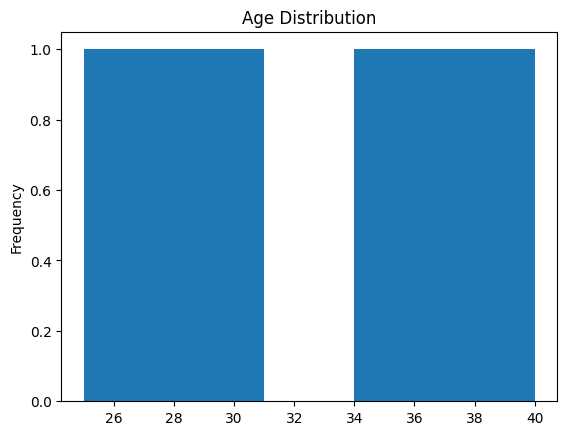

In [55]:
import matplotlib.pyplot as plt
df["Age"].plot(kind="hist", bins=5, title="Age Distribution")
plt.show()

In [56]:
correlation = df.corr()
print(correlation)

        Age  Income
Age     1.0     1.0
Income  1.0     1.0


In [57]:
df["Age"] = df["Age"].fillna(df["Age"].mean())  # Fill with mean
df["Income"] = df["Income"].fillna(method="ffill")  # Forward-fill
print(df)

   Age  Income
0   25   50000
1   30   60000
2   35   70000
3   40   80000


/tmp/ipykernel_3602/865410746.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Income"] = df["Income"].fillna(method="ffill")  # Forward-fill


In [58]:
import cProfile
import pandas as pd

def process_data():
    df = pd.DataFrame({"A": range(1_000_000), "B": range(1_000_000)})
    df["C"] = df["A"] + df["B"]
    return df

cProfile.run("process_data()")

         2421 function calls (2391 primitive calls) in 0.032 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
      2/1    0.000    0.000    0.030    0.030 2336242327.py:4(process_data)
        3    0.000    0.000    0.000    0.000 <frozen _collections_abc>:104(_check_methods)
        2    0.000    0.000    0.000    0.000 <frozen _collections_abc>:288(__subclasshook__)
        1    0.000    0.000    0.000    0.000 <frozen _collections_abc>:407(__subclasshook__)
        8    0.000    0.000    0.000    0.000 <frozen abc>:117(__instancecheck__)
        5    0.000    0.000    0.000    0.000 <frozen abc>:121(__subclasscheck__)
        5    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:1390(_handle_fromlist)
      2/1    0.001    0.000    0.031    0.031 <string>:1(<module>)
        1    0.000    0.000    0.001    0.001 __init__.py:226(compile)
        1    0.000    0.000    0.001    0.001 __init__.py:280(_compile)